# Which movie does reddit think will win best picture?

This project leverages sentiment analysis of Reddit comments to predict potential Best Picture nominees. By collecting user comments from official discussion threads of various movies on the /r/movies subreddit, the program categorizes the sentiments expressed in the comments as positive, negative, or neutral. Sentiment scores are calculated for each movie based on the comments’ emotional tone, providing insights into how well-received the film is by the Reddit community.

The sentiment analysis is performed using TextBlob, and the results are visualized through bar charts and minimalist donut charts to showcase the distribution of sentiments and the overall sentiment score. The project’s goal is to analyze the public’s reaction to movies and hypothesize which films may have the most favorable reception, possibly correlating with future award nominations, such as the Academy Award for Best Picture.

The analysis can be extended to include additional movies and threads, providing a dynamic and data-driven approach to movie discussions online.

I went through the r/movies submit and grabbed the offical discusion for each film. I then used praw to pull down and loop through all of the comments. and used Textblob to score each comment which I used to create a sentiment score. i really wanted to use r/truefilm for this analysis, but 

TLDR: r/movie 

An error occurred: received 429 HTTP response


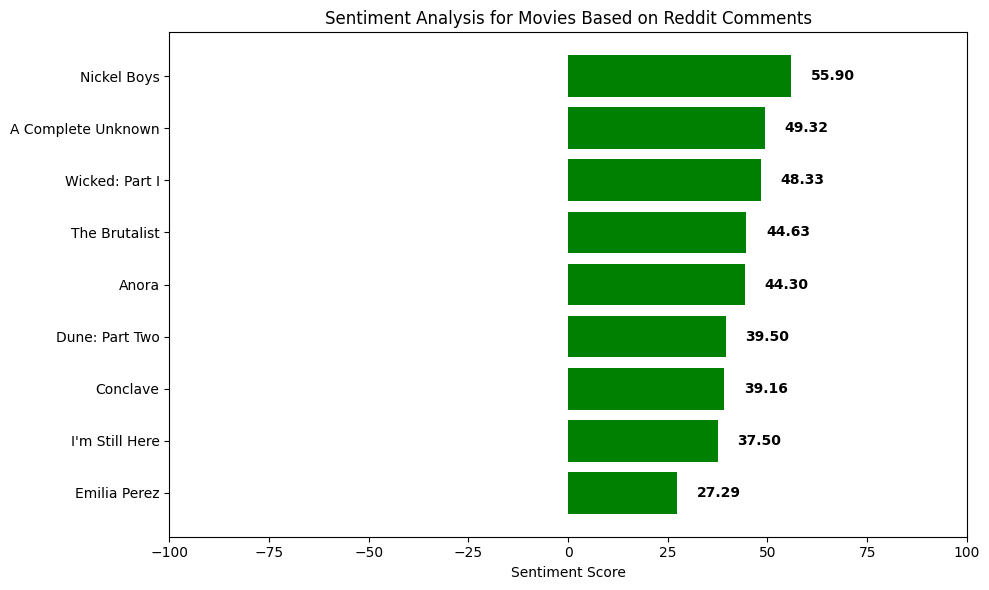

[('Nickel Boys', 55.90062111801242), ('A Complete Unknown', 49.321266968325794), ('Wicked: Part I', 48.331273176761435), ('The Brutalist', 44.63327370304114), ('Anora', 44.29678848283499), ('Dune: Part Two', 39.50396516871404), ('Conclave', 39.15978994748687), ("I'm Still Here", 37.5), ('Emilia Perez', 27.29124236252546)]


In [ ]:
import praw
import matplotlib.pyplot as plt
from textblob import TextBlob
import time

# Assuming you're using PRAW for Reddit API access
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Define the analyze_sentiment function
def analyze_sentiment(text):
    # Simple sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Returns a value between -1 and 1
    return sentiment

# The list of movie names and URLs
urls_and_movies = [
    ("Anora", "https://www.reddit.com/r/movies/comments/1ggv4yg/official_discussion_anora_spoilers/"),
    ("The Brutalist", "https://www.reddit.com/r/movies/comments/1i37yra/official_discussion_the_brutalist_spoilers/"),
    ("A Complete Unknown", "https://www.reddit.com/r/movies/comments/1hlsi27/official_discussion_a_complete_unknown_spoilers/"),
    ("Conclave", "https://www.reddit.com/r/movies/comments/1gbjlm7/official_discussion_conclave_spoilers/"),
    ("Dune: Part Two", "https://www.reddit.com/r/movies/comments/1b3jo9s/official_discussion_dune_part_two_spoilers/"),
    ("Emilia Perez", "https://www.reddit.com/r/movies/comments/1grn0lz/official_discussion_emilia_p%C3%A9rez_spoilers/"),
    ("I'm Still Here", "https://www.reddit.com/r/movies/comments/1gpzxb2/im_still_here_official_trailer_2025/"),
    ("Nickel Boys", "https://www.reddit.com/r/movies/comments/1i8m8iz/official_discussion_nickel_boys_spoilers/"),
    ("The Substance", "https://www.reddit.com/r/movies/comments/1fl1bpl/official_discussion_the_substance_spoilers/"),
    ("Wicked: Part I", "https://www.reddit.com/r/movies/comments/1gwxxy1/official_discussion_wicked_part_i_spoilers/")
]

movie_scores = []

# Loop through all of the comments and assign each a score
for movie, url in urls_and_movies:
    try:
        # Fetch the Reddit post
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)
        comments = submission.comments.list()

        # Initialize the lists to store comments
        positive_comments = []
        negative_comments = []
        neutral_comments = []

        # Loop through the comments to analyze sentiment
        for comment in comments:
            comment_body = comment.body
            sentiment_score = analyze_sentiment(comment_body)

            # Categorize the sentiment score
            if sentiment_score > 0:
                positive_comments.append(comment_body)
            elif sentiment_score < 0:
                negative_comments.append(comment_body)
            else:
                neutral_comments.append(comment_body)

        # Calculate the sentiment score
        positive_count = len(positive_comments)
        negative_count = len(negative_comments)
        neutral_count = len(neutral_comments)
        total_comments = positive_count + negative_count + neutral_count
        if total_comments > 0:
            score = (positive_count - negative_count) / total_comments * 100
        else:
            score = 0

        movie_scores.append((movie, score))

    except praw.exceptions.APIException as e:
        if e.error_type == 'RATELIMIT':
            print(f'Rate limit exceeded. Sleeping for {e.sleep_time} seconds.')
            time.sleep(e.sleep_time)
        else:
            raise
    except Exception as e:
        print(f'An error occurred: {e}')
        time.sleep(60)  # Sleep for 60 seconds before retrying

# Sort the movie scores from highest to lowest
movie_scores.sort(key=lambda x: x[1], reverse=True)

# Now create a single bar chart showing the sentiment score for each movie
movies = [movie for movie, score in movie_scores]
scores = [score for movie, score in movie_scores]

# Create the bar chart (histogram)
plt.figure(figsize=(10, 6))
bars = plt.barh(movies, scores, color=['green' if score >= 0 else 'red' for score in scores])

# Add labels and title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Analysis for Movies Based on Reddit Comments')
plt.xlim(-100, 100)

# Reverse the y-axis to show 0 at the leftmost
plt.gca().invert_yaxis()

# Add data labels on each bar
for index, score in enumerate(scores):
    plt.text(score + (5 if score > 0 else -5), index, f'{score:.2f}', va='center', ha='left' if score > 0 else 'right', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()
# Save the graph as an image file
plt.savefig("sentiment_analysis_graph.png", format='png')

# Print movie scores for reference
print(movie_scores)